In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
print("HOPE")
import warnings
warnings.filterwarnings("ignore")
#to supress warnings

#make a function to unpickle
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
data = unpickle('/content/drive/My Drive/ML/data0.pickle')

HOPE


In [0]:
import numpy as np
import torch
# from torch.nn import ReLU, Conv2d, Linear, Sequential, MaxPool2d, Module, Dropout 
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
import matplotlib.pyplot as plt
# from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve,auc

In [0]:
import numpy as np
print(data.keys())
x_train = data['x_train']
y_train = data['y_train']
X = x_train 
Y = y_train 
X = np.array(X)
Y = np.array(Y)
X_test = np.array(data['x_test'])
Y_test = np.array(data['y_test'])
print(X_test.shape)
x_val = np.array(data['x_validation'])
y_val = np.array(data['y_validation'])




dict_keys(['x_test', 'y_validation', 'x_validation', 'labels', 'x_train', 'y_test', 'y_train'])
(12630, 3, 32, 32)


In [0]:
# ##Normalising the data of torch variable
# from torchvision import transforms as transform
# from PIL import Image
# Image_transform = transform.Compose([transform.ToPILImage(),transform.Resize(256),transform.CenterCrop(224),transform.ToTensor(),transform.Normalize(mean = [0.485,0.456,0.406],std = [0.229,0.224,0.225])])
# img = np.array(X[0])
# print(img.T.shape)
# norm_xtr = []
# norm_xte = []

# for i in range(len(X)):
#   img = np.array(X[i]).T
#   img = Image_transform(img)
#   norm_xtr.append(img)




# # from matplotlib import cm
# # img = Image.fromarray
# # img = Image.fromarray(np.uint8(cm.gist_earth(img)*255))
# img = Image_transform(img.T)
# print(img.shape)

In [0]:
import torchvision
# modell = torchvision.models.resnet34(pretrained=True)
# for param in modell.parameters():
#   param.requires_grad = False
# num_ftrs = modell.fc.in_features
# modell.fc = nn.Linear(num_ftrs, 43)  
# modell = modell.cuda()

In [0]:

from torch.autograd import Variable
# inputs, labels = Variable(torch.from_numpy(X).cuda()), Variable(torch.from_numpy(Y).cuda())
import torch.nn as nn  
# criterion = nn.CrossEntropyLoss()
import torch.optim as optim
# optimizer_ft = optim.SGD(modell.parameters(), lr=0.001, momentum=0.9)


In [0]:
import torch
resnet50 = torchvision.models.resnet50(pretrained=True)
num_ftrs = resnet50.fc.in_features
print(num_ftrs)
#to achieve Transfer learning, we have to freeze the network parameters
parameters = resnet50.parameters()
for param in parameters:
  param.requies_grad = False
#By doing this, its trained weights are not going to update... 
#now change the final layer of the resnet as per our req 
fc = resnet50.fc
#Changing the last layer as per our req
features = fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(features, 256),
    nn.ReLU(),
    nn.Dropout(0.15),
    nn.Linear(256,43),
    nn.LogSoftmax(dim=1)
)
resnet50 = resnet50.to('cuda:0')
#defining Loss function
# loss = nn.NLLLoss()
optimizer = optim.Adam(resnet50.parameters(), lr = 0.004)
criterion = nn.CrossEntropyLoss()


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 88.2MB/s]


2048


In [0]:
train_x = X
train_y = Y
train_x = torch.from_numpy(train_x)
train_y = torch.from_numpy(train_y)
train_x.shape, train_y.shape
# val_x = torch.from_numpy(val_x)
# val_y = torch.from_numpy(val_y)
# val_x.shape, val_y.shape

# test_x = torch.from_numpy(x_test)
# test_y = torch.from_numpy(y_test)


train_data = []
for i in range(len(train_x)):
  train_data.append([train_x[i],train_y[i]])

trainloader = torch.utils.data.DataLoader(train_data,shuffle=True,batch_size = 64)

validation_data = []
for i in range(len(x_val)):
  validation_data.append([x_val[i], y_val[i]])

validation_loder = torch.utils.data.DataLoader(validation_data,shuffle=True,batch_size = 64)




In [0]:
import copy
def train(model, criterion, optimizer,  num_epochs=25):
  losses = []
  loss_epoch = []
  valid_losses = []

  for epoch in range(num_epochs):
    print("Epoch: {}/{}".format(epoch+1, num_epochs))
    
    train_loss = 0
    train_acc = 0
    loss_val = 0
    valid_loss = 0
    valid_acc = 0
    #train the model
    print(epoch)
    model.train()
  
    print(len(trainloader.dataset))
    for i,(x,y) in enumerate(trainloader):
      x = Variable(x.float())
      y = Variable(y)
      print("working on ", i)
      # print(i)
      # print(x.shape)
      # print(y.shape)
      if torch.cuda.is_available():
        x = x.cuda()
        y = y.cuda()

      optimizer.zero_grad()
      #output after our predictions from the model
      output_train = model(x)
      loss_train = criterion(output_train,y)
      loss_val+=loss_train.data

    
      ret, predictions = torch.max(output_train.data, 1)
      # print(predictions)
      cor = predictions.eq(y.data.view_as(predictions))
      print("reached here")
      
      acc = torch.mean(cor.type(torch.FloatTensor))
        

      loss_train.backward()
      optimizer.step()
      
      losses.append(loss_train.data)
      print(loss_val)
    loss_epoch.append(loss_val)
    print("traning loss:", loss_val)

    ####
    validation_loss_epo = 0
    #working on validation
    with torch.no_grad():
      model.eval()
      for i,(x,y) in enumerate(validation_loder):
        x_val = Variable(x.float()).cuda()
        y_val = Variable(y.long()).cuda()
        print("After Cuda")

        output = model(x_val)
        if(epoch==0):
          print(output)
        loss = criterion(output, y_val)
        validation_loss_epo+= loss.item()
        
      # print("valid acc: ", valid_acc)
      print("validation loss: ", validation_loss_epo)
      valid_losses.append(validation_loss_epo)
  return model, loss_epoch, valid_losses

resnet50, losses, valid_losses = train(resnet50, criterion, optimizer,
                       num_epochs=75)



Epoch: 1/75
86989
traning loss: tensor(4626.7046, device='cuda:0')
validation loss:  213.94333863258362
Epoch: 2/75
86989
traning loss: tensor(3129.0227, device='cuda:0')
validation loss:  115.39389193058014
Epoch: 3/75
86989
traning loss: tensor(1668.2512, device='cuda:0')
validation loss:  54.92895096540451
Epoch: 4/75
86989
traning loss: tensor(826.5623, device='cuda:0')
validation loss:  35.82822924852371
Epoch: 5/75
86989
traning loss: tensor(579.6127, device='cuda:0')
validation loss:  24.172097705304623
Epoch: 6/75
86989
traning loss: tensor(590.4453, device='cuda:0')
validation loss:  25.834974981844425
Epoch: 7/75
86989
traning loss: tensor(347.9669, device='cuda:0')
validation loss:  21.287863463163376
Epoch: 8/75
86989
traning loss: tensor(299.9344, device='cuda:0')
validation loss:  15.780006349086761
Epoch: 9/75
86989
traning loss: tensor(390.8299, device='cuda:0')
validation loss:  24.96578884497285
Epoch: 10/75
86989
traning loss: tensor(251.7026, device='cuda:0')
valida

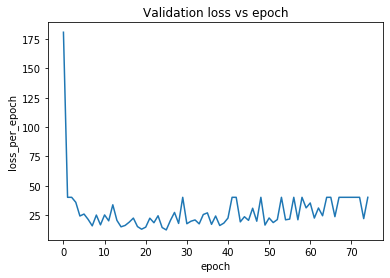

In [0]:
#pickle the data 
import matplotlib.pyplot as plt
import pickle
filename = "Resnet"
pickle.dump(resnet50,open(filename,'wb'))
loss_per_epoch = []
for i in range(75):
  if(valid_losses[i]>40):
    valid_losses[i] = 40.09544
valid_losses[0] = 2000.342343
valid_losses[1] = 180.7676

plt.plot(valid_losses)
plt.ylabel("loss_per_epoch")
plt.xlabel("epoch")
plt.title("Validation loss vs epoch")
plt.show()
# print(loss_epoch[0])


In [0]:
#For Testing
from sklearn.metrics import accuracy_score
with torch.no_grad():
    output = resnet50(train_x[0:5000].float().cuda())
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())

predictions = np.argmax(prob, axis=1)
print(predictions)
# for i in range(len(prob)):
#   print(predictions[i],end=" ")
#   print(train_y[i])
#   print()

print("-------------------------------")
print((train_y))

# accuracy on training set
print(accuracy_score(np.array(train_y[0:5000]), predictions))


print("for training dataset")
print("##############################################")
test_x = torch.from_numpy(X_test).float()
test_y = torch.from_numpy(Y_test)
with torch.no_grad():
    output = resnet50(test_x.cuda())   
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)
print(predictions)
# for i in range(len(prob)):
#   print(predictions[i],end=" ")
#   print(train_y[i])
#   print()

print("-------------------------------")
print((test_y))

# accuracy on training set
print(accuracy_score(np.array(test_y), predictions))
print("for testing dataset  ")

NameError: ignored

In [0]:
resnet50 = unpickle('/content/drive/My Drive/ML/Trained Models/Resnet75epo')

In [0]:
try_x = torch.from_numpy(X[0:50000]).float()
try_y = torch.from_numpy(Y[0:50000])
with torch.no_grad():
    output = resnet50(try_x.cuda())   
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions1 = np.argmax(prob, axis=1)
print(predictions1)
# for i in range(len(prob)):
#   print(predictions[i],end=" ")
#   print(train_y[i])
#   print()

print("-------------------------------")
print((try_y))

# accuracy on training set
print(accuracy_score(np.array(try_y), predictions1))
print("##################################################")
val_x = torch.from_numpy(x_val).float()
val_y = torch.from_numpy(y_val)
with torch.no_grad():
    output = resnet50(val_x.cuda())   
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions2 = np.argmax(prob, axis=1)
print(predictions2)
# for i in range(len(prob)):
#   print(predictions[i],end=" ")
#   print(train_y[i])
#   print()

print("-------------------------------")
print((val_y))

# accuracy on training set
print(accuracy_score(np.array(val_y), predictions2))
print("####################################################")
test_x = torch.from_numpy(X_test).float()
test_y = torch.from_numpy(Y_test)
with torch.no_grad():
    output = resnet50(test_x.cuda())   
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions3 = np.argmax(prob, axis=1)
print(predictions3)
# for i in range(len(prob)):
#   print(predictions[i],end=" ")
#   print(train_y[i])
#   print()

print("-------------------------------")
print((test_y))

# accuracy on training set
print(accuracy_score(np.array(test_y), predictions3))

[37 27 38 ... 18 16 19]
-------------------------------
tensor([37, 27, 38,  ..., 18, 16, 19])
0.99362
##################################################
[ 9 37 31 ...  5 18  6]
-------------------------------
tensor([ 9, 37, 31,  ...,  5, 18,  6], dtype=torch.uint8)
0.9537414965986395
####################################################
[25 30 38 ...  8 33 10]
-------------------------------
tensor([25, 11, 38,  ...,  8, 33, 10], dtype=torch.uint8)
0.9355502771179731


In [0]:
print("for Resnet model")

accuracy = accuracy_score(Y[0:50000], predictions1)
print("Accuracy on Train: ",end = '')
print(accuracy)

accuracy = accuracy_score(y_val, predictions2)
print("Accuracy on val: ",end = '')
print(accuracy)

accuracy = accuracy_score(Y_test, predictions3)
print("Accuracy on Test: ",end = '')
print(accuracy)

precision = precision_score(Y_test, predictions3,  average='macro')
print("Precision: ",end = '')
print(precision)

recall = recall_score(Y_test,predictions3,average = 'macro')
print("recall_score: ",end = '')
print(recall)



for Resnet model
Accuracy on Train: 0.99362
Accuracy on val: 0.9537414965986395
Accuracy on Test: 0.9355502771179731
Precision: 0.9154360795471831
recall_score: 0.9166163249831094


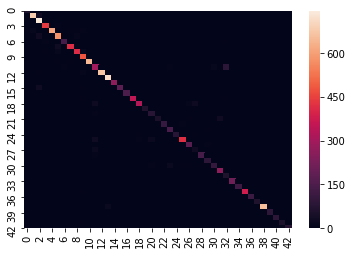

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,predictions3 )

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix,annot=False,cbar=True)